In [1]:
import polars as pl

In [2]:
pl.Config.set_fmt_str_lengths(100)

polars.config.Config

In [33]:
files = (
    pl.read_csv('/iblm/netapp/home/dlaub/projects/hyena-dna/data/cactus_arrow_dataset_65536.txt', separator='\t')
    .with_columns(species=pl.col('fasta').str.split('/').list.get(-1).str.split('.').list.get(0))
)
files.head()

fasta,bed,species
str,str,str
"""/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/fast…","""/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/tile…","""Acinonyx_jubatus"""
"""/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/fast…","""/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/tile…","""Acomys_cahirinus"""
"""/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/fast…","""/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/tile…","""Ailuropoda_melanoleuca"""
"""/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/fast…","""/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/tile…","""Ailurus_fulgens"""
"""/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/fast…","""/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/tile…","""Allactaga_bullata"""


In [34]:
files.row(0)[0]

'/iblm/netapp/data4/shared_dir/hyena_dna_collab/cactus_mutli_alignment/hal_centric_region_alloc/fasta_files/Acinonyx_jubatus.fasta.gz'

In [35]:
1341 / 3

447.0

In [10]:
beds = [pl.scan_ipc(b).with_columns(pl.lit(s).alias('species')) for _, b, s in files.iter_rows()]
all_beds = pl.concat(beds).collect()

In [16]:
all_beds.head()

chrom,chromStart,chromEnd,name,species
str,i64,i64,str,str
"""LLWD01000001.1""",0,52415,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",0,65536,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",65536,131072,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",131072,196608,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",196608,262144,"""train""","""Acinonyx_jubatus"""


In [13]:
all_beds.height

171896964

In [14]:
all_beds['chrom'].n_unique()

138441444

In [17]:
by_c_s = all_beds.unique(['chrom', 'species'])

In [20]:
by_c_s.height

164218514

In [18]:
dup = by_c_s.filter(pl.col('chrom').is_duplicated())
dup.head()

chrom,chromStart,chromEnd,name,species
str,i64,i64,str,str
"""k141_100819""",0,28984,"""valid""","""Allenopithecus_nigroviridis"""
"""k141_1012738""",0,1819,"""train""","""Allenopithecus_nigroviridis"""
"""k141_1012768""",0,1225,"""train""","""Allenopithecus_nigroviridis"""
"""k141_1012988""",0,1772,"""train""","""Allenopithecus_nigroviridis"""
"""k141_101883""",0,2024,"""train""","""Allenopithecus_nigroviridis"""


In [21]:
lengths = (all_beds['chromEnd'] - all_beds['chromStart']).to_numpy()

In [24]:
lengths.max()

65536

<Axes: ylabel='Count'>

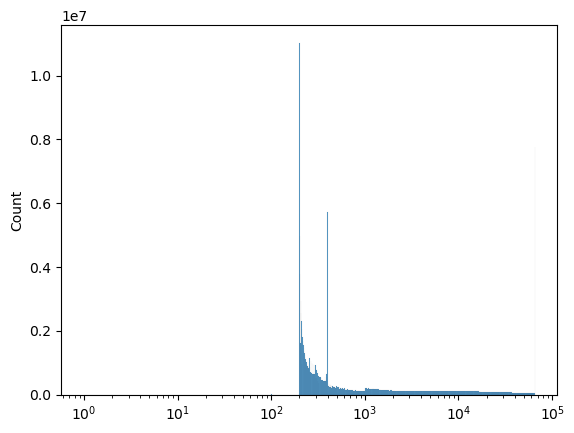

In [23]:
sns.histplot(lengths, log_scale=True)

In [25]:
dup = dup.sort('chrom')

In [27]:
dup.tail()

chrom,chromStart,chromEnd,name,species
str,i64,i64,str,str
"""tarseq_998""",0,65536,"""train""","""Ateles_geoffroyi_b"""
"""tarseq_998""",0,10007,"""train""","""Hylobates_pileatus_a"""
"""tarseq_998""",0,24212,"""train""","""Symphalangus_syndactylus"""
"""tarseq_999""",0,28023,"""train""","""Symphalangus_syndactylus"""
"""tarseq_999""",0,9892,"""train""","""Nomascus_siki_b"""


In [29]:
kb65 = all_beds.filter((pl.col('chromEnd') - pl.col('chromStart')) == 2**16)
kb65.height

7732677

In [30]:
uniq_65kb_c = kb65['chrom'].unique()

In [31]:
common = set(dup['chrom'].unique()) & set(uniq_65kb_c)
len(common)

835197

In [39]:
kb65.head()

chrom,chromStart,chromEnd,name,species
str,i64,i64,str,str
"""LLWD01000002.1""",0,65536,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",65536,131072,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",131072,196608,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",196608,262144,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",262144,327680,"""train""","""Acinonyx_jubatus"""


In [40]:
kb65.rename({'name': 'split'}).write_ipc('/iblm/netapp/data4/shared_dir/hyena_dna_collab/training_datasets/cactus_dataset_exactly_2to16_all_bed.arrow')

In [3]:
kb65 = pl.read_ipc('/iblm/netapp/data4/shared_dir/hyena_dna_collab/training_datasets/cactus_dataset_exactly_2to16_all_bed.arrow')
kb65.head()

chrom,chromStart,chromEnd,split,species
str,i64,i64,str,str
"""LLWD01000002.1""",0,65536,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",65536,131072,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",131072,196608,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",196608,262144,"""train""","""Acinonyx_jubatus"""
"""LLWD01000002.1""",262144,327680,"""train""","""Acinonyx_jubatus"""


In [5]:
kb65.filter(pl.col('chrom') == 'KB469739.1')

chrom,chromStart,chromEnd,split,species
str,i64,i64,str,str
"""KB469739.1""",65536,131072,"""train""","""Mus_musculus"""
"""KB469739.1""",131072,196608,"""train""","""Mus_musculus"""
"""KB469739.1""",196608,262144,"""valid""","""Mus_musculus"""
"""KB469739.1""",262144,327680,"""valid""","""Mus_musculus"""
